In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [7]:
"""
The TfidfVectorizer is a text feature extraction method that transforms a collection of text documents into a matrix of numerical features. 
TfidfVectorizer stands for "Term Frequency-Inverse Document Frequency Vectorizer". The vectorizer first tokenizes the text into words and then
computes the term frequency (TF) and inverse document frequency (IDF) of each word. The term frequency is the number of times a word appears in
a document, while the inverse document frequency is a measure of how important a word is across all documents in the collection. Words that appear
frequently in a document but rarely in the collection have a high term frequency but a low inverse document frequency, while words that appear rarely
in a document but frequently in the collection have a low term frequency but a high inverse document frequency.The TfidfVectorizer computes a weight
for each word in each document based on the TF-IDF score of the word. The weight reflects how important the word is to the document. The resulting 
matrix is a sparse matrix where each row corresponds to a document and each column corresponds to a word. The value in each cell represents the 
weight of the word in the corresponding document. The TfidfVectorizer is often used in natural language processing (NLP) tasks such as document 
classification, clustering, and information retrieval. It allows us to represent text data in a numerical format that can be easily processed by 
machine learning algorithms.

The idea behind TF-IDF is to weigh the importance of a word based on its frequency in the document and its rarity in the corpus. In other words,
a word that appears frequently in a document but rarely in the entire corpus is likely to be more important than a word that appears frequently 
in both the document and the corpus.

TF-IDF calculation:
Term Frequency (TF): This measures how frequently a word appears in a document. It's calculated as the number of times a word appears
in a document divided by the total number of words in the document.

TF(word, document) = (number of times word appears in document) / (total number of words in document)
Inverse Document Frequency (IDF): This measures how rare a word is in the corpus. It's calculated as the logarithm of the total
number of documents in the corpus divided by the number of documents that contain the word.

IDF(word, corpus) = log (total number of documents in corpus / number of documents containing word)
TF-IDF: This is simply the product of TF and IDF.

TF-IDF(word, document, corpus) = TF(word, document) * IDF(word, corpus)
The resulting TF-IDF score reflects the importance of a word in a document relative to its importance in the corpus. 
Words that appear frequently in a document but rarely in the corpus will have a high TF-IDF score, indicating that they
are important for understanding the meaning of the document.
"""

'\nThe idea behind TF-IDF is to weigh the importance of a word based on its frequency in the document and its rarity in the corpus. In other words,\na word that appears frequently in a document but rarely in the entire corpus is likely to be more important than a word that appears frequently \nin both the document and the corpus.\n'

c:\Users\jkbch\Projects\tue\VisualAnal\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0:
1. Word: gastech
   TF: 0.0516, IDF: 1.5674, TF-IDF: 0.0808, Total Frequency: 39
2. Word: kronos
   TF: 0.0443, IDF: 1.1963, TF-IDF: 0.0529, Total Frequency: 44
3. Word: modernization
   TF: 0.0320, IDF: 3.2579, TF-IDF: 0.1044, Total Frequency: 10
4. Word: abila
   TF: 0.0292, IDF: 1.4003, TF-IDF: 0.0409, Total Frequency: 26
5. Word: gas
   TF: 0.0284, IDF: 2.3332, TF-IDF: 0.0662, Total Frequency: 16
6. Word: government
   TF: 0.0256, IDF: 1.6684, TF-IDF: 0.0427, Total Frequency: 26
7. Word: construction
   TF: 0.0252, IDF: 3.6086, TF-IDF: 0.0910, Total Frequency: 8
8. Word: people
   TF: 0.0236, IDF: 2.1976, TF-IDF: 0.0518, Total Frequency: 15
9. Word: 20
   TF: 0.0231, IDF: 3.0433, TF-IDF: 0.0703, Total Frequency: 8
10. Word: new
   TF: 0.0230, IDF: 2.9459, TF-IDF: 0.0677, Total Frequency: 9

Cluster 1:
1. Word: gastech
   TF: 0.1399, IDF: 1.5674, TF-IDF: 0.2193, Total Frequency: 39
2. Word: sanjorge
   TF: 0.1245, IDF: 2.5100, TF-IDF: 0.3124, Total Frequency: 19
3. Word:

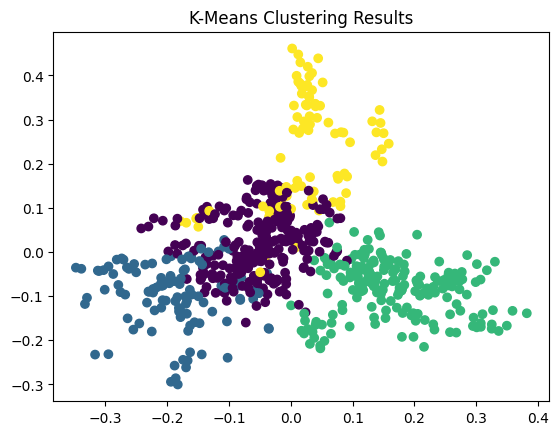

In [11]:
# Load the pre-processed data from the CSV file
df = pd.read_csv('results/input_cleaned.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(inplace=True)

# Vectorize the content column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# Perform k-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# # Get the most important words for each cluster
# order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names_out()

# # Get the indices of the top 10 words for each cluster
# order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# for i in range(n_clusters):
#     print(f"Cluster {i} top {top_n} words:")
#     cluster_words = []
#     for ind in order_centroids[i, :top_n]:
#         tf = X[:, ind].sum()
#         idf = vectorizer.idf_[ind]
#         tf_idf = tf * idf
#         word = vectorizer.get_feature_names_out()[ind]
#         cluster_words.append((word, tf, idf, tf_idf))
#         print(f"{word} - TF: {tf}, IDF: {idf:.2f}, TF-IDF: {tf_idf:.2f}")
#     print()

top_n = 10
# Create a list of tuples with each word and its corresponding index
feature_names = vectorizer.get_feature_names_out()

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# For each cluster center, print the top 10 words with their corresponding TF, IDF, and TF-IDF scores
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    center = cluster_centers[i]
    top_indices = center.argsort()[-top_n:][::-1]
    for j, index in enumerate(top_indices):
        word = feature_names[index]
        tf = center[index]
        idf = vectorizer.idf_[index]
        tf_idf = tf * idf
        total_freq = X[:, index].sum()
        print(f"{j+1}. Word: {word}\n   TF: {tf:.4f}, IDF: {idf:.4f}, TF-IDF: {tf_idf:.4f}, Total Frequency: {total_freq:.0f}")

# Plot the clusters in 2D using PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

plot_data = []
for i, title in enumerate(df['title']):
    plot_data.append(((pca_X[i, 0], pca_X[i, 1]), title))

plt.scatter(pca_X[:, 0], pca_X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.show()
